## Full pipeline prototyping
Notebook for prototyping the full generation pipeline

In [1]:
import sys
sys.path.append("../") # go to parent dir
from pptx_generation.planner import Planner
from pptx_generation.generation import Generator
from htmlrender.renderer import HTMLRenderer
from llm.llmwrapper import LLM


### Initialization

In [2]:
llm1 = LLM(provider="gemini", model="gemini-2.0-flash")
llm2 = LLM(provider="gemini", model="gemini-2.5-flash")
pln, gen = Planner(), Generator()

INFO:root:LLM initialized
INFO:root:Provider: gemini
INFO:root:Model: gemini-2.0-flash
INFO:root:LLM initialized
INFO:root:Provider: gemini
INFO:root:Model: gemini-2.5-flash


### Pipeline

In [3]:
query = "Make a presentation about building a system which takes an internal company database of contract documents, and based on a user query, helps find the most relevant contract document"

In [5]:
pptx_plan = pln.plan_content(query=query, llm_1=llm1)

2025-07-08 23:28:40.385 | INFO     | pptx_generation.planner:brainstorm:25 - PPTX Planning STEP 1: Brainstorming implementation approach based on user query...
                    QUERY: "Make a presentation about building a system which takes an internal company database of contract documents, and based on a user query, helps find the most relevant contract document"

INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.0-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-08 23:28:56.939 | INFO     | pptx_generation.planner:brainstorm:35 - PPTX Planning STEP 1: Brainstorming complete!
2025-07-08 23:28:56.940 | INFO     | pptx_generation.planner:outline:70 - PPTX Planning STEP 2: Creating high-level Presentation outline...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://gene

In [6]:
pptx_plan['processed_slide_content']['slide_content']

{'slide_1': '**Title Slide**\n\n*   **Title:** Intelligent Contract Document Search System: A Proposal\n*   **Subtitle:** Unlocking Knowledge and Efficiency Through Semantic Search\n*   **Your Name:** [Your Name]\n*   **Your Title:** Tech Consultant\n*   **Date:** [Date]\n\n**Visual:** Company logo in the top left corner. A subtle background image of interconnected nodes representing knowledge and data flow.',
 'slide_2': '**Executive Summary**\n\n*   **Title:** Executive Summary\n*   **Problem:** Finding relevant contract documents is currently slow, inaccurate, and relies heavily on manual keyword searches, leading to missed information and inefficiencies.\n*   **Solution:** We propose an AI-powered semantic search system that understands the *meaning* of contracts and user queries, delivering highly relevant results quickly.\n*   **Key Benefits:**\n    *   **Improved Search Accuracy:** Find the right contracts, even with complex or nuanced queries.\n    *   **Faster Retrieval:** Red

In [7]:
title_slide_content = pptx_plan['processed_slide_content']['slide_content']['slide_1']
print(title_slide_content)

**Title Slide**

*   **Title:** Intelligent Contract Document Search System: A Proposal
*   **Subtitle:** Unlocking Knowledge and Efficiency Through Semantic Search
*   **Your Name:** [Your Name]
*   **Your Title:** Tech Consultant
*   **Date:** [Date]

**Visual:** Company logo in the top left corner. A subtle background image of interconnected nodes representing knowledge and data flow.


In [8]:
agenda_slide_content = pptx_plan['processed_slide_content']['slide_content']['slide_2']
print(agenda_slide_content)

**Executive Summary**

*   **Title:** Executive Summary
*   **Problem:** Finding relevant contract documents is currently slow, inaccurate, and relies heavily on manual keyword searches, leading to missed information and inefficiencies.
*   **Solution:** We propose an AI-powered semantic search system that understands the *meaning* of contracts and user queries, delivering highly relevant results quickly.
*   **Key Benefits:**
    *   **Improved Search Accuracy:** Find the right contracts, even with complex or nuanced queries.
    *   **Faster Retrieval:** Reduce search time from hours to seconds, boosting productivity.
    *   **Reduced Risk:** Ensure comprehensive identification of relevant clauses for better compliance.
    *   **Enhanced Decision-Making:** Access critical contract information quickly to make informed decisions.
*   **Call to Action:** This proposal outlines a plan to transform contract document management, leading to significant cost savings and improved decision-m

2025-07-08 23:30:40.869 | INFO     | pptx_generation.generation:generate_title_slide:89 - Generating title slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-08 23:31:01.322 | INFO     | pptx_generation.generation:generate_title_slide:97 - Reviewing generated HTML...
2025-07-08 23:31:03.858 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-08 23:31:03.880 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
INFO:google_ge

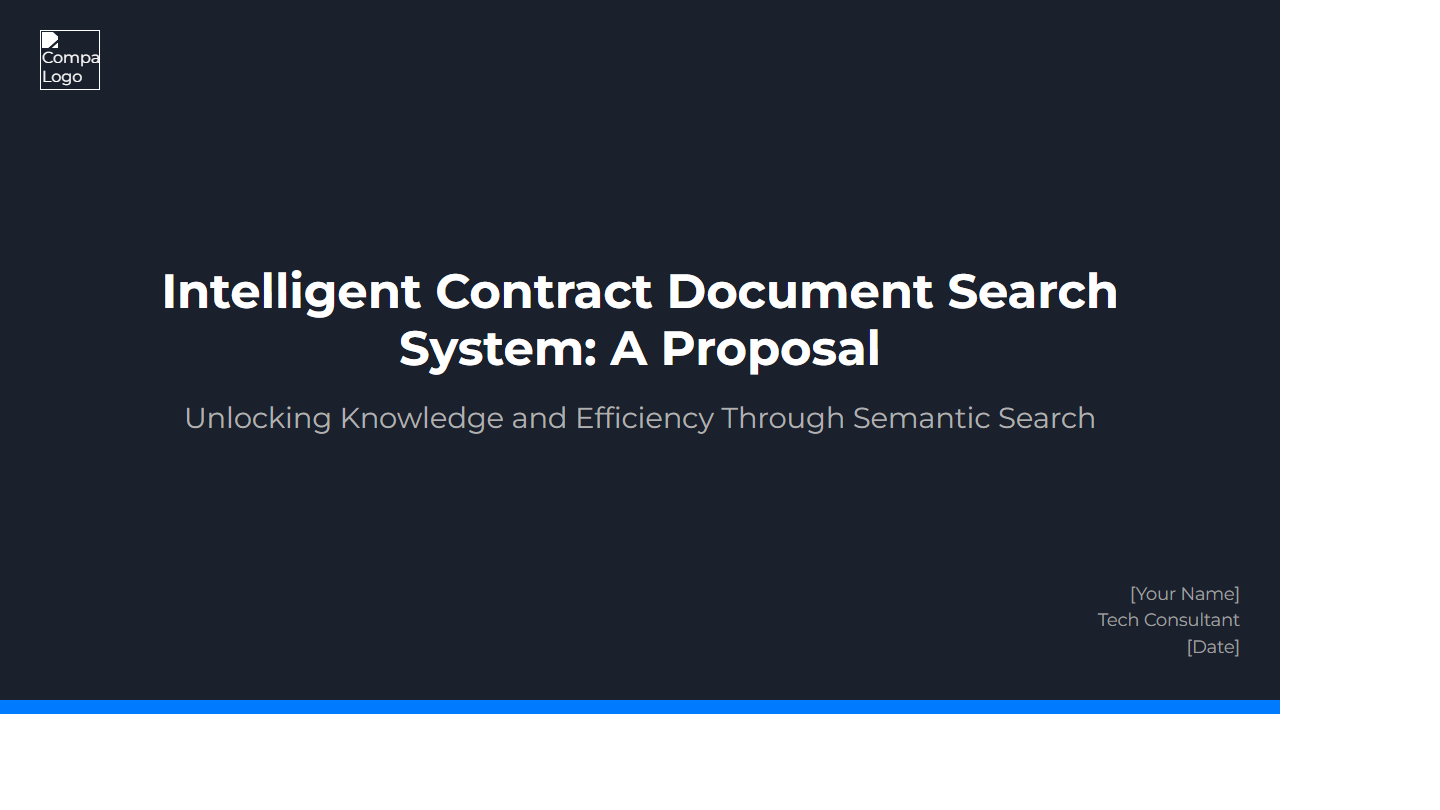

In [9]:
rndr = HTMLRenderer()
title_slide_html = gen.generate_title_slide(query=query, slide_content=title_slide_content, generator_llm=llm2, reviewer_llm=llm2, review=True)
html_img = rndr.renderHTML(html_str=title_slide_html, resize=False)
display(html_img)


In [10]:
agenda_slide_prompt = \
f"""
You are a tech consultant, and you have been given the following request:
"{query}"

You are trying to create a set of slides for a proposal.
So far you have created the title slide, the html code for this slide is below.
Next, you are creating the executive summary slide. Like the title slide, generate this slide in HTML.

Title slide HTML:
```html
{title_slide_html}
```

Make sure to follow the guidelines below:
- Make sure to follow a design style that matches the provided example HTML code to maintain consistency across the presentation.
- DO NOT include the presenter name, their title, the date and any company logos on this slide. This is to save space.
- Titles should be aligned to the top left-hand side of the slide
- Use tailwind for styling 
- Only use google fonts for typography
- Be careful about the font size, to make sure that text fits on the slide. 
Titles should be 2.3em, subtitles at around 1.3em and normal text should be around 0.9em.
If the slide content defined below is only a few key words or short sentences, you can increase the subtitle size up to 1.8, and normal text size up to 1.3.
- If you are displaying the slide content in a content grid, always set 
    grid-template-columns: auto auto;
    grid-template-rows: auto auto; 
- Try to use icons. If you do, only use font awesome icons
- Be creative with the slide design. Try your best to use visual elements to both enhance the message and make the slides visually engaging.
    
This slide will become a template master slide which will define the style of the following slides, so design this slide with great care.
Do not output any other text other than the html itself.
IMPORTANT: DO NOT truncate any existing code with /* ... (Existing styles from Title Slide) ... */, you MUST output the full code.
If your slides are visually appealing but also functional, you will be rewarded with a bonus.

The information that should be included on this slide is as follows:
{agenda_slide_content}
"""

2025-07-08 23:31:21.222 | INFO     | pptx_generation.generation:generate_agenda_slide:146 - Generating Agenda slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-08 23:31:55.935 | INFO     | pptx_generation.generation:generate_agenda_slide:159 - Reviewing generated HTML...
2025-07-08 23:31:58.298 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-08 23:31:58.311 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
INFO:goog

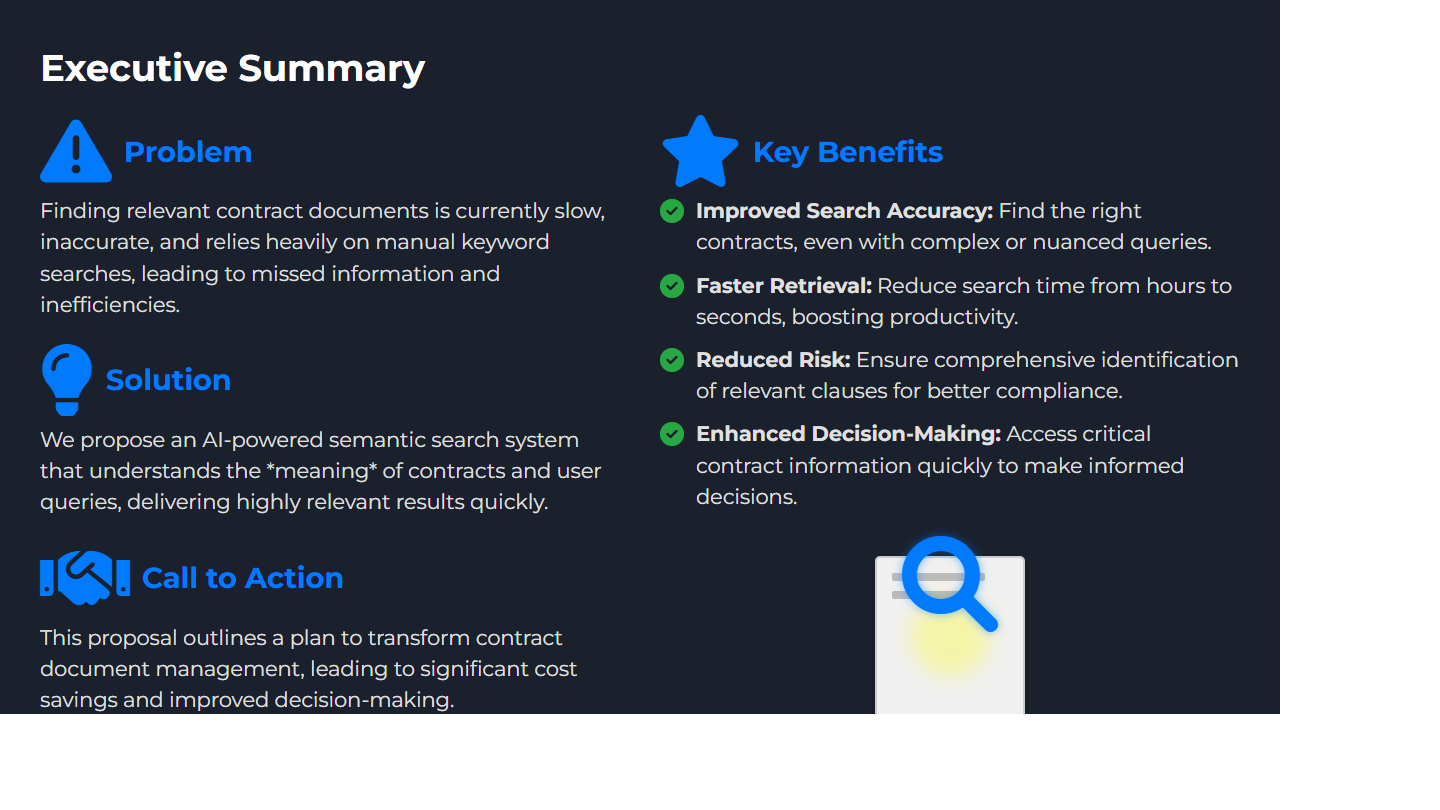

In [11]:
agenda_slide_html = gen.generate_agenda_slide(query=query, slide_content=agenda_slide_content, title_slide_html=title_slide_html, generator_llm=llm2, reviewer_llm=llm2, review=True, custom_prompt=agenda_slide_prompt)
html_img = rndr.renderHTML(html_str=agenda_slide_html, resize=False)
display(html_img)

In [12]:
print(agenda_slide_html)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Executive Summary - Intelligent Contract Document Search System</title>
    <link href="https://fonts.googleapis.com/css2?family=Montserrat:wght@400;700&display=swap" rel="stylesheet">
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.0.0-beta3/css/all.min.css">
    <script src="https://cdn.tailwindcss.com"></script>
    <style>
        /* General Reset & Box-sizing */
        * {
            box-sizing: border-box;
            margin: 0;
            padding: 0;
        }

        /* Slide Container - Defines the 720p slide dimensions and base styles */
        /* Converted to Tailwind classes where possible, keeping specific dimensions as inline style or custom class */
        .slide-container {
            width: 1280px; /* 720p width */
            height: 720px; /* 720p height */
            fo

### Generating remaining slides

2025-07-08 23:34:16.780 | INFO     | pptx_generation.generation:generate_general_slide:201 - Generating slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-08 23:34:50.369 | INFO     | pptx_generation.generation:generate_general_slide:214 - Reviewing generated HTML...
2025-07-08 23:34:52.434 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-08 23:34:52.442 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
INFO:google_ge

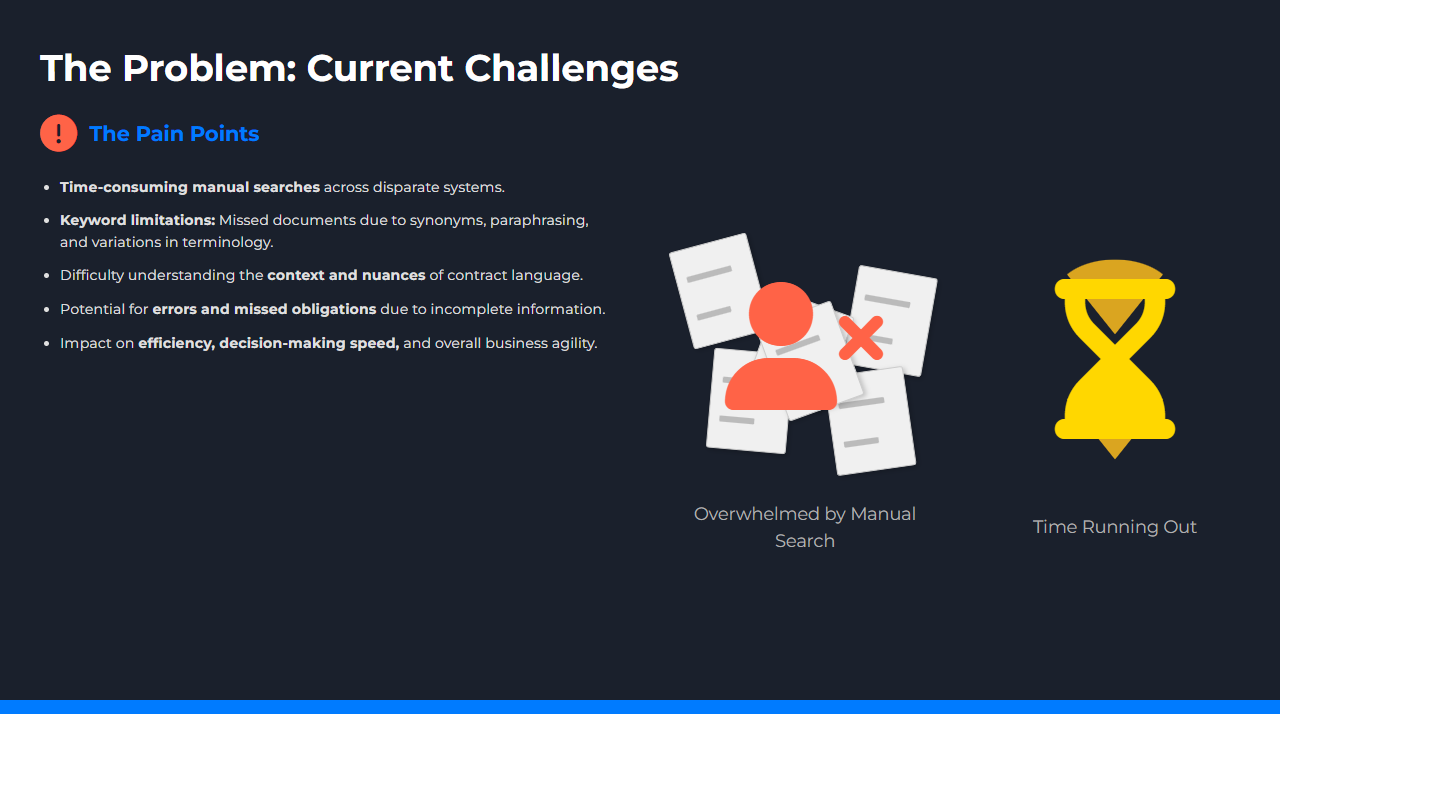

2025-07-08 23:35:15.797 | INFO     | pptx_generation.generation:generate_general_slide:201 - Generating slide...
INFO:google_genai.models:AFC is enabled with max remote calls: 10.
INFO:httpx:HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"
INFO:google_genai.models:AFC remote call 1 is done.
2025-07-08 23:35:32.820 | INFO     | pptx_generation.generation:generate_general_slide:214 - Reviewing generated HTML...
2025-07-08 23:35:34.894 | INFO     | htmlrender.renderer:renderHTML:12 - Saving rendered HTML image to temp file: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
2025-07-08 23:35:34.910 | INFO     | htmlrender.renderer:renderHTML:26 - Temp file removed: c:\Users\thefu\OneDrive\Documents\My Actual Documents\Personal\Neural networks and Machine learning\pptx-planner\experimentation\html_render.png
INFO:google_ge

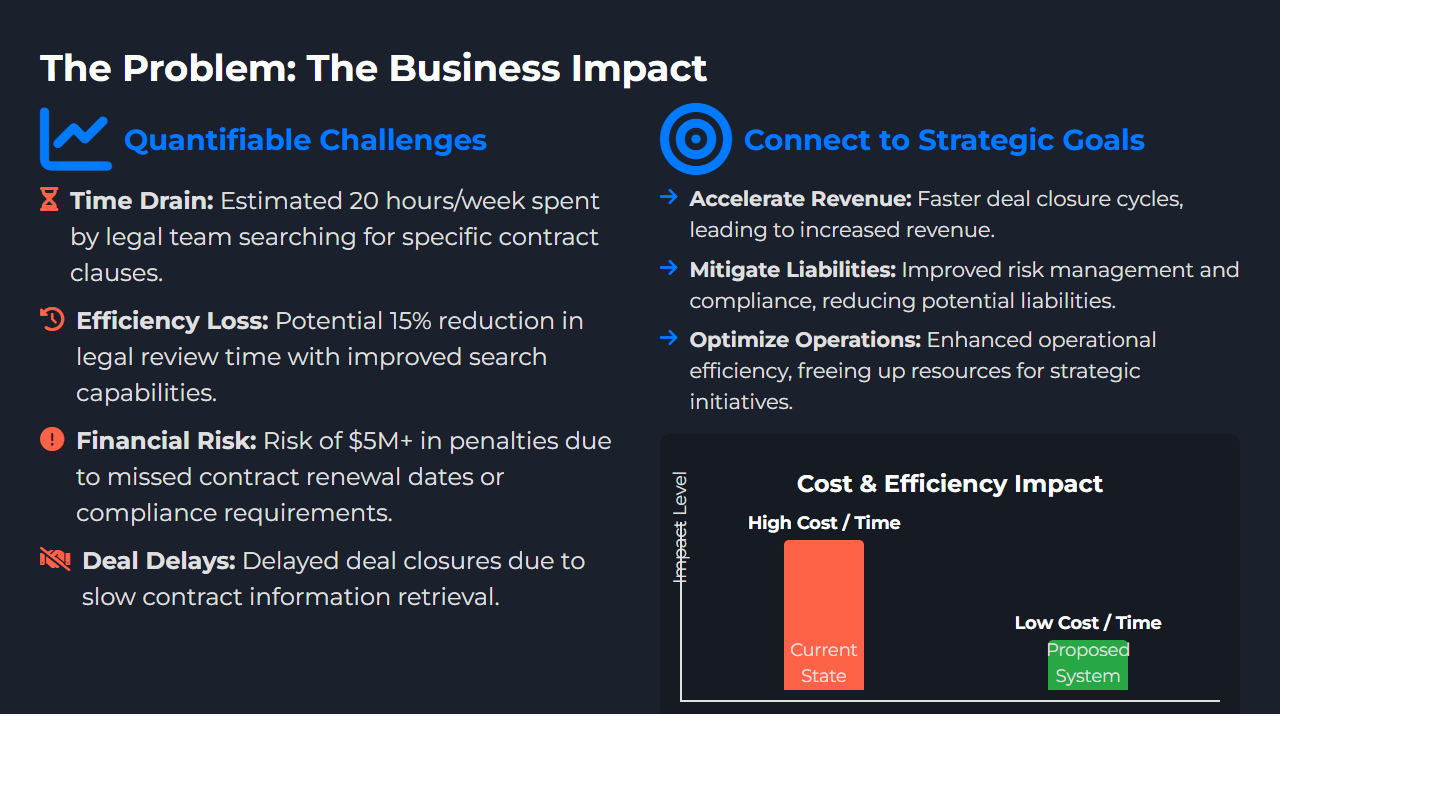

In [13]:
existing_slide_content = []
existing_slide_content = existing_slide_content + [{'name': 'Title slide', 'html' : title_slide_html}]
existing_slide_content = existing_slide_content + [{'name': 'Agenda slide', 'html' : agenda_slide_html}]

final_output = []
for slide in list(pptx_plan['processed_slide_content']['slide_content'].keys())[2:4]:

    slide_content = pptx_plan['processed_slide_content']['slide_content'][slide]
    slide_html = gen.generate_general_slide(query=query, slide_content=slide_content, existing_slide_content=existing_slide_content, generator_llm=llm2, reviewer_llm=llm2, review=True)
    html_img = rndr.renderHTML(html_str=slide_html, resize=False)
    display(html_img)
    final_output = final_output + [{ 'name' : slide, 'html' : slide_html}]

In [11]:
print(final_output[2]['html'])

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Our Solution: AI-Powered Semantic Search</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;700&display=swap" rel="stylesheet">
    <!-- Font Awesome for icons -->
    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.4/css/all.min.css">
    <style>
        /* Base styles for the HTML document */
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh; /* Ensures the slide is vertically centered on the page */
            background-color: #f0f0f0; /* Light background for the area outside the slide */
            font-family: 'Roboto', sans-serif; /* Modern, clean sans-serif font */
            overflow: hidden; /* Prevents scrollbars i

In [22]:
print(title_slide_html)

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Intelligent Contract Document Search System: A Proposal</title>
    <link href="https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;700&display=swap" rel="stylesheet">
    <style>
        /* Base styles for the HTML document */
        body {
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            min-height: 100vh; /* Ensures the slide is vertically centered on the page */
            background-color: #f0f0f0; /* Light background for the area outside the slide */
            font-family: 'Roboto', sans-serif; /* Modern, clean sans-serif font */
            overflow: hidden; /* Prevents scrollbars if the slide perfectly fits the viewport */
        }

        /* Styles for the main slide container */
        .slide-container {
